# Effect of Monthly Income, Employment Status, Bank Card Utilization and Rating on Loan Statuses
## by (Joseph Osuntoki)

## Investigation Overview

In this investigation, I wanted to lexplore the relationships that exist between the varaibles in the dataset but more specifically, to understand the impact of the variables on loan status.


## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The aim of this project is to use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns, and relationships. Out of 81 variables presented, I extracted 20 for the purpose of this analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv("LoansData.csv")
loan_data = loan[["Term","LoanStatus","CreditGrade","BorrowerAPR","EstimatedReturn","ProsperRating (numeric)",
                  "ProsperRating (Alpha)","ListingCategory (numeric)","BorrowerState","Occupation",
                  "EmploymentStatus","EmploymentStatusDuration","RevolvingCreditBalance","LoanOriginationQuarter",
                  "IsBorrowerHomeowner","BankcardUtilization","StatedMonthlyIncome",
                  "LoanMonthsSinceOrigination","LoanOriginalAmount","Investors"]]

In [3]:
loan_data['ProsperRating (Alpha)'] = loan_data['ProsperRating (Alpha)'].combine_first(loan_data['CreditGrade'])
loan_data.drop('CreditGrade', axis =1, inplace =True)
loan_data.drop('ProsperRating (numeric)', axis =1, inplace =True)

In [4]:
obj = loan_data.columns[loan_data.dtypes==object]

for i in obj:
    if loan_data[i].isna().sum()>1:
        loan_data[i].fillna(loan_data[i].mode()[0], inplace = True)

In [5]:
numeric = loan_data.columns[loan_data.dtypes!=object]

for i in numeric:
    if loan_data[i].isna().sum()>1:
        loan_data[i].fillna(loan_data[i].mean(), inplace = True)

In [6]:
dct = {0:"Not Available", 1:"Debt Consolidation", 2:"Home Improvement", 3:"Business", 
       4:"Personal Loan", 5:"Student Use", 6:"Auto", 7:"Other", 8:"Baby&Adoption", 9:"Boat", 10:"Cosmetic Procedure",
       11:"Engagement Ring", 12:"Green Loans", 13:"Household Expenses", 14:"Large Purchases", 15:"Medical/Dental", 
       16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"}

loan_data['ListingCategory (numeric)'] = loan_data['ListingCategory (numeric)'].map(dct)

state = {"AL":"Alabama", "AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut",
 "DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa",
 "KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan",
 "MN":"Minnesota","MS":"Mississippi", "MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire",
 "NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma",
 "OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas",
 "UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}

loan_data['BorrowerState'] = loan_data['BorrowerState'].map(state)

In [7]:
loan_data["BorrowerAPR"] = round(loan_data["BorrowerAPR"]*100,1)
loan_data["EstimatedReturn"] = round(loan_data["EstimatedReturn"]*100,1)
loan_data["BankcardUtilization"] = round(loan_data["BankcardUtilization"]*10,1)

loan_data.rename(columns={'ProsperRating (Alpha)':'Rating', 'ListingCategory (numeric)': 'Category',
                          'EstimatedReturn': 'Return', 'EmploymentStatusDuration': 'Work_duration',
                          'IsBorrowerHomeowner': 'Homeowner','StatedMonthlyIncome':'Monthly_Income', 
                          "LoanMonthsSinceOrigination":'Loan_months','LoanOriginalAmount':'Principal',
                          'BorrowerAPR':'APR',"LoanOriginationQuarter":"LoanDate"}, inplace = True)

loan_data['Season'] = loan_data['LoanDate'].apply(lambda x:x[0:2])
loan_data['Year'] = loan_data['LoanDate'].apply(lambda x:x[3:7])

loan_data.drop('LoanDate', axis = 1, inplace = True)

In [8]:
loan_data['Work_duration'] = loan_data['Work_duration'].astype(int)
loan_data['RevolvingCreditBalance'] = loan_data['RevolvingCreditBalance'].astype(int)
loan_data['Monthly_Income'] = loan_data['Monthly_Income'].astype(int)

loan_data['EmploymentStatus'][loan_data['EmploymentStatus'] == 'Full-time'] = 'Employed'
loan_data['EmploymentStatus'][loan_data['EmploymentStatus'] == 'Part-time'] = 'Employed'
loan_data['EmploymentStatus'][loan_data['EmploymentStatus'] == 'Self-employed'] = 'Employed'
loan_data['EmploymentStatus'][loan_data['EmploymentStatus'] == 'Not available'] = 'Other'

## Relationship between Bankcard Utilization and LoanStatus - Violin Plot
After performing some data wrangling on the extracted variables, the violin plot of the Bankcard Utilization and LoanStatus vraiables showed no obvious relationship existing between the two. The distribution is almost the same for completed and defaulted categories.

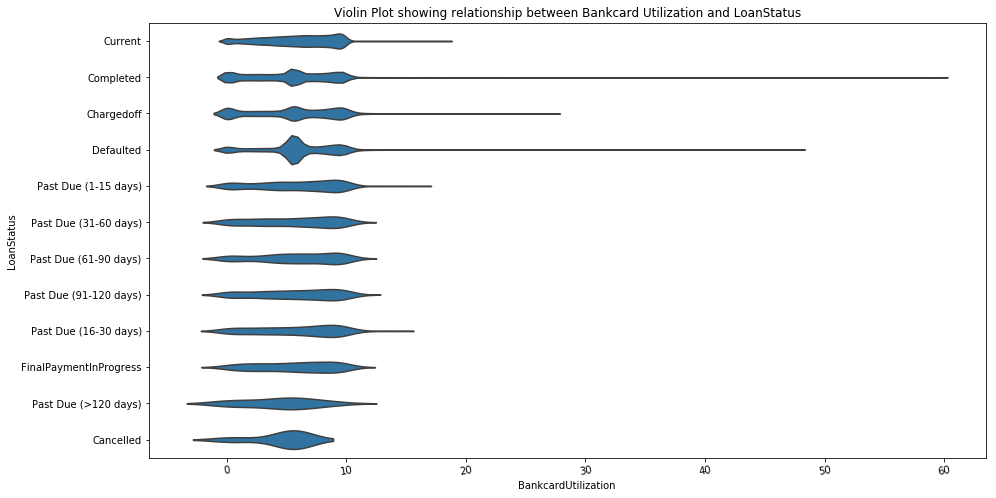

In [9]:
ct = loan_data['LoanStatus'].value_counts()
plt.figure(figsize = [15, 8]) 
base_color = sb.color_palette()[0]
sb.violinplot(data=loan_data, y='LoanStatus', x='BankcardUtilization', color=base_color, order = ct.index, inner=None)
plt.xticks(rotation=10);
plt.title("Violin Plot showing relationship between Bankcard Utilization and LoanStatus");

## Relationship between Monthly_Income and Loan Status - Box Plot
The monthly income features was capped at 75000 to deal with outliers and to make our visualization visible and more appealing. From the box plot visual, it is obvious that defaulted loans and other past due loans are associated with lower monthly income compared to the "completed" and "current" categories. It's simple, the higher the monthly income, the better.

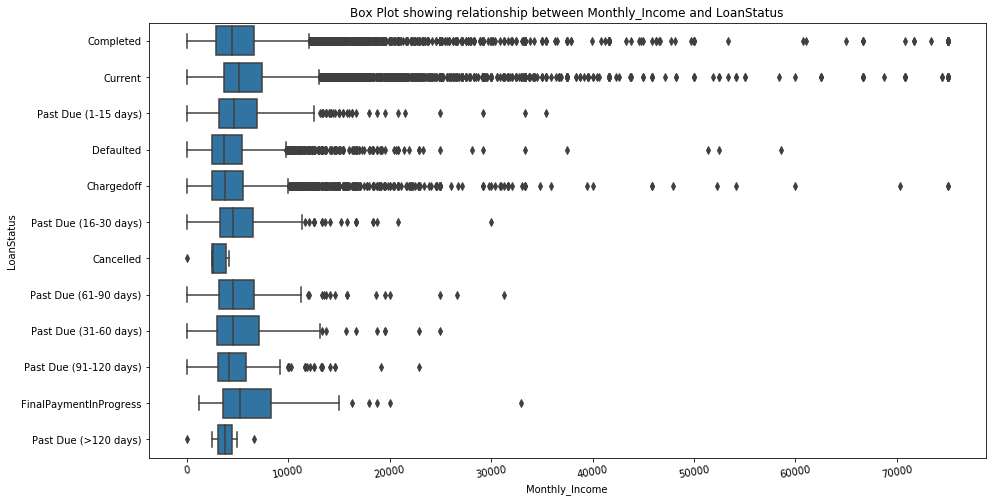

In [10]:
loan_data['Monthly_Income'][loan_data['Monthly_Income'] > 75000] = 75000
plt.figure(figsize = [15, 8]) 
base_color = sb.color_palette()[0]
sb.boxplot(data=loan_data, y='LoanStatus', x='Monthly_Income', color=base_color)
plt.xticks(rotation=10);
plt.title("Box Plot showing relationship between Monthly_Income and LoanStatus");

## Relationship between Rating and Loan Status - Heat Map

From the heatmap, we can see that a large number of loans were given to C-rated customers. This was probably done in a bid to charge higher APRs (Annual Percentage Rates), but it's a risky adventure that should be carefully managed. A huge number was handed out to A and B rated customers which is good.

In the defaulted category, it is obvious that as the lower credit ratings are associated with higher default rates. The higher the credit rating, the better.

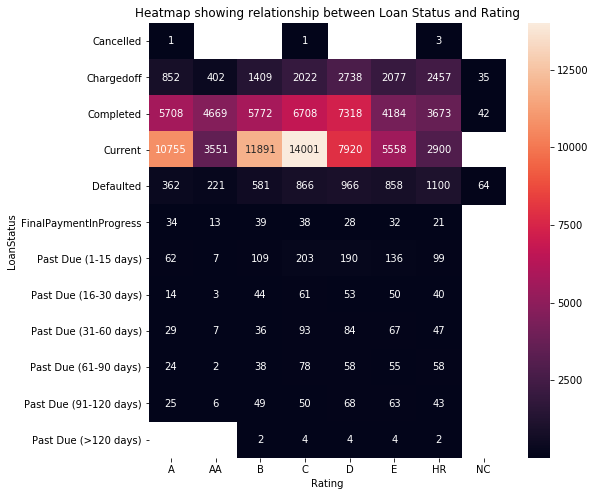

In [11]:
ct_counts = loan_data.groupby(['LoanStatus', 'Rating']).size();
ct_counts = ct_counts.reset_index(name='count');
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'Rating', values = 'count');
plt.figure(figsize = [8, 8]);
sb.heatmap(ct_counts,annot = True, fmt = '.0f');
plt.title('Heatmap showing relationship between Loan Status and Rating');

## Relationship between Employment Status and Loan Status
Looking at the visual, over 45% of loans still currently in payment are by employed obligors. And 30% of loans completed are by employed customers (either full time or part time). This is why the proportion bar chart is preferred to the gross numbers type. The proportion of loans completed or in payment is overwhelmingly dominated by employed customers compared to the other categories.

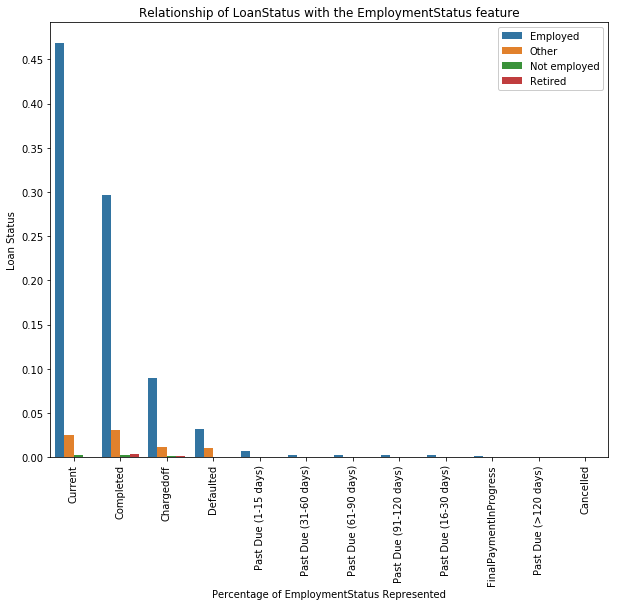

In [12]:
def biv_bar(data):
    count = loan_data['LoanStatus'].value_counts()
    order = count.index
    
    n_ = loan_data['LoanStatus'].value_counts().sum()
    max_count = count[0]
    max_prop = max_count / n_
    # establish tick locations and create plot
    base_color = sb.color_palette()[0]
    ticks = np.arange(0, max_prop, 0.05)
    tick_names = ['{:0.2f}'.format(v) for v in ticks]
    
    plt.figure(figsize = (10,8));
    base_color = sb.color_palette()[0];
    ax = sb.countplot(data=loan_data, x= 'LoanStatus', hue = data, order = order);
    plt.yticks(ticks * n_, tick_names)
    plt.xlabel("Percentage of " + data + " Represented")
    plt.ylabel("Loan Status")
    plt.title('Relationship of LoanStatus with the ' + data + " feature")
    ax.legend(loc = 1, framealpha = 1)
    plt.xticks(rotation = 90)

biv_bar('EmploymentStatus')

### Generate Slideshow

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert loan_slide.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook loan_slide.ipynb to slides
[NbConvertApp] Writing 284233 bytes to loan_slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/loan_slide.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: